In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#reading Dataset
sales= pd.read_csv(r"C:\Users\user\Downloads\joined_prdct_sales.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sales

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,SalesID,SalesPersonID,CustomerID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,828,1,20776,6,NaN,"0,00",2018-02-06 02:03:36.510,IA25MG6AYXG98JVCIR85
1,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,1067,13,51465,14,NaN,"0,00",2018-02-22 11:38:32.200,MV4DE6O1SG63Z0OMA38O
2,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,2870,8,98251,25,0.2,"0,00",2018-01-02 21:36:45.720,CDU8SIYJRFWZHANNFBVZ
3,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,3964,3,84428,22,0.2,"0,00",2018-04-23 05:57:08.060,HZU2GOMELGAVMM2GWV3H
4,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,4192,17,22096,6,NaN,"0,00",2018-02-23 06:47:25.480,IR2QE9HM2NHMBW4NMIUH
5,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,4276,23,57549,15,NaN,"0,00",2018-04-28 09:42:47.910,MHIJP9BT2R1BY550EDPH
6,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,4319,21,53432,14,NaN,"0,00",2018-04-07 12:03:54.010,MR9K17UYLMVQFZ9ICY7K
7,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,5399,12,88599,23,NaN,"0,00",2018-03-16 10:45:20.490,S31INXGCOVMMKUP9PAEA
8,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,6160,5,11068,3,NaN,"0,00",2018-04-19 18:28:41.130,IOXLI3CBIAI21TXR35SV
9,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN,6950,17,23894,7,NaN,"0,00",2018-04-11 22:46:33.600,BGP2LMVC5TIJJ4ISD35Z


#removing unwanted variables

In [ ]:
sales.drop(['TotalPrice','ModifyDate','SalesDate','TransactionNumber'],axis=1,inplace=True)

In [5]:
sales

,ProductID,ProductName,Price,CategoryID,Class,Resistant,IsAllergic,VitalityDays,SalesID,SalesPersonID,CustomerID,Quantity,Discount
0,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,828,1,20776,6,NaN
1,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,1067,13,51465,14,NaN
2,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,2870,8,98251,25,0.2
3,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,3964,3,84428,22,0.2
4,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,4192,17,22096,6,NaN
5,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,4276,23,57549,15,NaN
6,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,4319,21,53432,14,NaN
7,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,5399,12,88599,23,NaN
8,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,6160,5,11068,3,NaN
9,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,6950,17,23894,7,NaN


In [6]:
#Sanity Check
sales.head()

,ProductID,ProductName,Price,CategoryID,Class,Resistant,IsAllergic,VitalityDays,SalesID,SalesPersonID,CustomerID,Quantity,Discount
0,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,828,1,20776,6,NaN
1,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,1067,13,51465,14,NaN
2,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,2870,8,98251,25,0.2
3,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,3964,3,84428,22,0.2
4,1,Flour - Whole Wheat,"74,2988",3,Medium,Durable,NaN,NaN,4192,17,22096,6,NaN


In [7]:
sales.shape

(6758125, 13)

In [8]:
sales.describe()

,ProductID,CategoryID,VitalityDays,SalesID,SalesPersonID,CustomerID,Quantity,Discount
count,6.758125e+06,6.758125e+06,2.661575e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,1.351194e+06
mean,2.265474e+02,5.864278e+00,6.610745e+01,3.379063e+06,1.199972e+01,4.939567e+04,1.300401e+01,1.498871e-01
std,1.304744e+02,3.267920e+00,3.490174e+01,1.950903e+06,6.632689e+00,2.850504e+04,7.209701e+00,4.999989e-02
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-01
25%,1.140000e+02,3.000000e+00,3.300000e+01,1.689532e+06,6.000000e+00,2.470700e+04,7.000000e+00,1.000000e-01
50%,2.270000e+02,6.000000e+00,7.200000e+01,3.379063e+06,1.200000e+01,4.941400e+04,1.300000e+01,1.000000e-01
75%,3.400000e+02,9.000000e+00,9.500000e+01,5.068594e+06,1.800000e+01,7.407500e+04,1.900000e+01,2.000000e-01
max,4.520000e+02,1.100000e+01,1.200000e+02,6.758125e+06,2.300000e+01,9.875900e+04,2.500000e+01,2.000000e-01


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 13 columns):
ProductID        int64
ProductName      object
Price            object
CategoryID       int64
Class            object
Resistant        object
IsAllergic       object
VitalityDays     float64
SalesID          int64
SalesPersonID    int64
CustomerID       int64
Quantity         int64
Discount         float64
dtypes: float64(2), int64(6), object(5)
memory usage: 670.3+ MB


In [10]:
#count the missing Values
sales.isnull().values.sum()

13542590

In [11]:
#Calculate the percentage of Missing Values
sales.isnull().sum()*100/sales.shape[0]

ProductID         0.000000
ProductName       0.000000
Price             0.000000
CategoryID        0.000000
Class             0.000000
Resistant        30.983890
IsAllergic       28.782821
VitalityDays     60.616665
SalesID           0.000000
SalesPersonID     0.000000
CustomerID        0.000000
Quantity          0.000000
Discount         80.006378
dtype: float64

In [12]:
#dropping the na cells
sales_clean = sales.dropna()

In [13]:
#Sanity check
sales_clean.shape
sales_clean.isnull().sum()

ProductID        0
ProductName      0
Price            0
CategoryID       0
Class            0
Resistant        0
IsAllergic       0
VitalityDays     0
SalesID          0
SalesPersonID    0
CustomerID       0
Quantity         0
Discount         0
dtype: int64

In [14]:
sales_clean["ProductName"] = sales_clean["ProductName"].astype('category')
sales_clean.dtypes

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ProductID           int64
ProductName      category
Price              object
CategoryID          int64
Class              object
Resistant          object
IsAllergic         object
VitalityDays      float64
SalesID             int64
SalesPersonID       int64
CustomerID          int64
Quantity            int64
Discount          float64
dtype: object

In [15]:
sales_clean.head(15)

,ProductID,ProductName,Price,CategoryID,Class,Resistant,IsAllergic,VitalityDays,SalesID,SalesPersonID,CustomerID,Quantity,Discount
29576,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,888,8,78056,20,0.1
29580,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,1674,11,28156,8,0.1
29596,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,8072,2,43444,11,0.1
29597,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,8114,8,57986,15,0.2
29603,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,12987,7,36591,10,0.1
29605,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,13332,4,67525,18,0.1
29610,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,15217,3,85564,22,0.2
29614,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,16235,7,76673,20,0.2
29615,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,16569,12,50200,13,0.2
29626,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,22531,7,55397,15,0.1


#converting ProductName variable into numerical datatype as the algorithm cannot perform analysis on object/string datatype

In [16]:
sales_clean["ProductName_labled"] = sales_clean["ProductName"].cat.codes

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
sales_clean

,ProductID,ProductName,Price,CategoryID,Class,Resistant,IsAllergic,VitalityDays,SalesID,SalesPersonID,CustomerID,Quantity,Discount,ProductName_labled
29576,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,888,8,78056,20,0.1,44
29580,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,1674,11,28156,8,0.1,44
29596,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,8072,2,43444,11,0.1,44
29597,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,8114,8,57986,15,0.2,44
29603,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,12987,7,36591,10,0.1,44
29605,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,13332,4,67525,18,0.1,44
29610,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,15217,3,85564,22,0.2,44
29614,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,16235,7,76673,20,0.2,44
29615,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,16569,12,50200,13,0.2,44
29626,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,22531,7,55397,15,0.1,44


#converting Class variable into categorical datatype

In [18]:
sales_clean["Class"] = sales_clean["Class"].astype('category')
sales_clean.dtypes
sales_clean["Class_labled"] = sales_clean["Class"].cat.codes

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
sales_clean.dtypes

ProductID                int64
ProductName           category
Price                   object
CategoryID               int64
Class                 category
Resistant               object
IsAllergic              object
VitalityDays           float64
SalesID                  int64
SalesPersonID            int64
CustomerID               int64
Quantity                 int64
Discount               float64
ProductName_labled        int8
Class_labled              int8
dtype: object

#dropping unwanted columns which has NAN values

In [20]:
sales_clean.drop(['ProductName','Price','Resistant','Class','Resistant','IsAllergic','VitalityDays','SalesID','SalesPersonID','Quantity','Discount'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
sales_clean.drop('CustomerID',axis=1,inplace=True)

In [22]:
sales_clean.dtypes

ProductID             int64
CategoryID            int64
ProductName_labled     int8
Class_labled           int8
dtype: object

In [23]:
sales_clean['CategoryID']=sales_clean.CategoryID.astype('category')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=11)
# Fitting the input data
kmeans = kmeans.fit(sales_clean)
# Getting the cluster labels
labels = kmeans.predict(sales_clean)
# Centroid values
centroids = kmeans.cluster_centers_

In [25]:
# Comparing with scikit-learn centroids
#print(C) # From Scratch
print(centroids) # From sci-kit learn

[[311.62395879   6.71120329  42.32191483   1.1004583 ]
 [ 38.08290523   6.91655401  68.62123158   1.10159524]
 [194.1945026    6.39225004  30.1379166    1.1273656 ]
 [379.79138909   7.0051203   73.91559764   1.0090844 ]
 [360.51397587   7.50704048  35.60035307   1.00067252]
 [ 89.42399955   7.32376023  18.37941782   0.51143764]
 [128.84893368   6.6683557   67.50966089   0.82821983]
 [ 16.47652488   6.80811932  20.36924826   1.60092295]
 [269.35473584   6.27748691  20.06896716   1.14659686]
 [238.30717054   7.26831395  65.76967054   1.14079457]
 [420.60651502   3.67177759  33.51474305   1.15967425]]


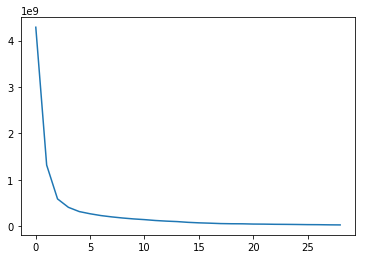

In [26]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,30)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(sales_clean)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [27]:
model_clus = KMeans(n_clusters = 6, max_iter=50)
model_clus.fit(sales_clean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


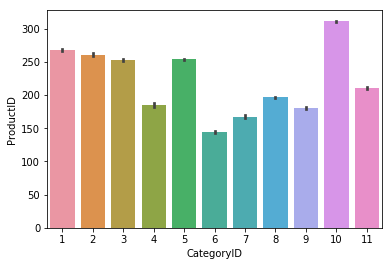

In [28]:
sns.barplot(x=sales_clean.CategoryID, y=sales_clean.ProductID)

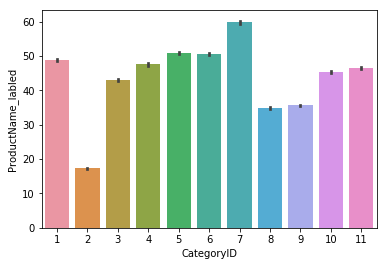

In [29]:
sns.barplot(x=sales_clean.CategoryID, y=sales_clean.ProductName_labled)

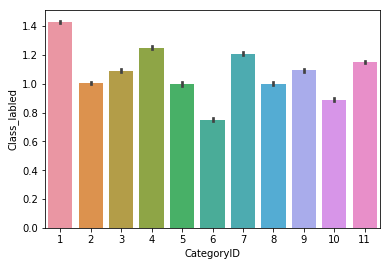

In [30]:
sns.barplot(x=sales_clean.CategoryID, y=sales_clean.Class_labled)